In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)  ##Semilla

In [2]:
from google.colab import files
files.upload=files.upload()

Saving dataset_Facebook.csv to dataset_Facebook.csv


In [3]:
#1. DATOS DESCARGADOS
Datos=pd.read_csv('dataset_Facebook.csv',delimiter=";",skiprows=1,names=["Total Me gustas","Tipo","Categoria","Pub mes","Pub semana","Pub hora",
                                                                         "Pagado","Alcance Pub","Impresión Pub","Usuarios compromeditos","Consumidores de Pub",
                                                                         "Consumos de Pub","Imp pub de  personas que les ha gustado tu pagina",
                                                                         "Pub de  personas que les ha gustado tu pagina","Alcance pub de  personas que les ha gustado tu pagina",
                                                                         "Comentarios","Me gusta","Cuota","Interacciones totales"])
Datos

,Total Me gustas,Tipo,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,Consumos de Pub,Imp pub de personas que les ha gustado tu pagina,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


In [4]:
Datos2=Datos.copy()##Para no reiniciar el Entorno

In [5]:
Datos2.dtypes ##Miramos que atributo es categorico para eliminarlo y trabajar solo con los numericos

Total Me gustas                                            int64
Tipo                                                      object
Categoria                                                  int64
Pub mes                                                    int64
Pub semana                                                 int64
Pub hora                                                   int64
Pagado                                                   float64
Alcance Pub                                                int64
Impresión Pub                                              int64
Usuarios compromeditos                                     int64
Consumidores de Pub                                        int64
Consumos de Pub                                            int64
Imp pub de  personas que les ha gustado tu pagina          int64
Pub de  personas que les ha gustado tu pagina              int64
Alcance pub de  personas que les ha gustado tu pagina      int64
Comentarios              

In [6]:
print("Tengo N=",len(Datos),"Instancias")

Tengo N= 500 Instancias


In [7]:
print("Tengo M=",len(Datos.columns),"Atributos")  # Numero de columnas

Tengo M= 19 Atributos


In [8]:
Datos2=Datos2.select_dtypes(include=['int64',"float64"]) #Eliminamos la columna o atributo Tipo que es categorica y deja los numericos
## OJO PROBAR CON  get_dummies para qe se etengan en cuenta las variables categoricas ya que esta funcion convierte en numeros la variable categorica

In [9]:
#2 DATOS FALTANTES Y CONTAMNACIÓN DE DATA
Perdidos_1=Datos[Datos.isna().any(axis=1)] 
print("Tengo N=",len(Perdidos_1),"datos perdidos")

Tengo N= 5 datos perdidos


In [10]:
##VAMOS A CREAR NAN ALEATORIOS EN LA DATA  .. CON EL SIGUIENTE CÓDIGO
length = len(Datos2)
for i in Datos2.columns[:-3]:
    num = int(np.random.randint(0,10)/100*length)
    idx_replace = np.random.randint(0, length-1, num)
    Datos2.loc[idx_replace, i] = np.nan

In [11]:
Perdidos=Datos2[Datos2.isna().any(axis=1)] # De los datos busca los NAN  .any en cualquier lado
#axis=1 por filas. Muestra las filas con almeno un nan sicolocamos el len encontramos el numeros de NAN
#len(Perdidos)  ##5 datos perdidos  ojoel axis= busca por filas y axis=0 busca por columnas
print("Tengo N=",len(Perdidos),"datos perdidos") #acá solo cuenta las filas de perdidos y no todos los datos si hay mas de 1 en una fila

Tengo N= 251 datos perdidos


In [12]:
Datos2.isnull().sum() #cuantos datos perdidos hay por variables 

Total Me gustas                                          10
Categoria                                                 0
Pub mes                                                   5
Pub semana                                                0
Pub hora                                                 45
Pagado                                                   21
Alcance Pub                                               5
Impresión Pub                                            10
Usuarios compromeditos                                   44
Consumidores de Pub                                      38
Consumos de Pub                                          39
Imp pub de  personas que les ha gustado tu pagina        15
Pub de  personas que les ha gustado tu pagina            31
Alcance pub de  personas que les ha gustado tu pagina    34
Comentarios                                              38
Me gusta                                                  1
Cuota                                   

In [14]:
#VARIAS COPIAS
Datos3=Datos2.copy()
Datos4=Datos2.copy()

In [15]:
#3 METODOLOGÍAS PARA RELLENAR DATOS
import random
def impute_nan_meanmedian(df, variable, value):  #Con esta funcion en la variable del otro codigo siguiente ingresala media en los NAN o lamediana
    if value=="median":
        val=df[variable].median()
    if value=="mean":
        val=df[variable].mean()
    df[variable+"_"+value]=df[variable].fillna(val)
    return df


def rand_float_range(start, end):  #Es tas función inserta en los NAN Un número aleatorio de la variable o un numero que asignemos 
    return random.random() * (end - start) + start

def impute_nan_random(df, variable, value=-9):
    if value!=-9:
        df[variable+"_random_fixed"]=df[variable].fillna(value)
    else:
        start,end=df[variable].min(),df[variable].max()
        df[variable+"_random"]=df[variable].fillna(rand_float_range(start,end))
    return df  
    ###TAREA CON ESTE METODO RELLENAR TODOS LOS ATRIBUTOS CON UN FOR 

In [16]:
impute_nan_meanmedian(Datos3, "Pub hora", "mean")  ##CREA OTRA COLUMNA CON EL MISMO NOMBRE MASS _  CON LOS QUE REEMPLAZAMOS CON LA MEDIA head muestra solo 10 filas
impute_nan_meanmedian(Datos3, "Pub hora", "median") ##CREA OTRA COLUMNA CON EL MISMO NOMBRE MASS _  CON LOS QUE REEMPLAZAMOS CON LA MEDIA

impute_nan_random(Datos3, "Pub hora", -9)# rellenamos con numeros aleatorio
impute_nan_random(Datos3, "Pub hora", 5)# rellenamos con 3

,Total Me gustas,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,...,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales,Pub hora_mean,Pub hora_median,Pub hora_random,Pub hora_random_fixed
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,...,1640.0,119.0,4.0,79.0,17.0,100,3.000000,3.0,3.000000,3.0
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,NaN,1457.0,1361.0,...,6112.0,1108.0,5.0,130.0,29.0,164,10.000000,10.0,10.000000,10.0
2,139441.0,3.0,12.0,3.0,NaN,0.0,2413.0,4373.0,177.0,113.0,...,1503.0,132.0,0.0,66.0,14.0,80,7.881319,9.0,4.531557,5.0
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,NaN,790.0,...,32048.0,1386.0,58.0,1572.0,147.0,1777,10.000000,10.0,10.000000,10.0
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,...,3200.0,396.0,NaN,325.0,49.0,393,3.000000,3.0,3.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093.0,3.0,1.0,7.0,2.0,0.0,4684.0,7536.0,733.0,708.0,...,2876.0,392.0,5.0,53.0,26.0,84,2.000000,2.0,2.000000,2.0
496,81370.0,2.0,1.0,5.0,8.0,0.0,3480.0,6229.0,537.0,NaN,...,2104.0,301.0,0.0,53.0,22.0,75,8.000000,8.0,8.000000,8.0
497,81370.0,1.0,1.0,5.0,2.0,0.0,3778.0,7216.0,625.0,572.0,...,2388.0,363.0,4.0,93.0,18.0,115,2.000000,2.0,2.000000,2.0
498,81370.0,3.0,1.0,4.0,11.0,0.0,4156.0,7564.0,626.0,574.0,...,2452.0,370.0,7.0,91.0,38.0,136,11.000000,11.0,11.000000,11.0


In [17]:
Datos3.isnull().sum() #cuantos datos perdidos hay por variables 

Total Me gustas                                          10
Categoria                                                 0
Pub mes                                                   5
Pub semana                                                0
Pub hora                                                 45
Pagado                                                   21
Alcance Pub                                               5
Impresión Pub                                            10
Usuarios compromeditos                                   44
Consumidores de Pub                                      38
Consumos de Pub                                          39
Imp pub de  personas que les ha gustado tu pagina        15
Pub de  personas que les ha gustado tu pagina            31
Alcance pub de  personas que les ha gustado tu pagina    34
Comentarios                                              38
Me gusta                                                  1
Cuota                                   

In [18]:
# MACHINE LEARNING  
#Para el instalado con CONDA antes de la siguiente linea de códigos Hay que colocar: conda install sklearn

from sklearn.impute import KNNImputer  ##Con este algoritmo rellenamos  los vacios con
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
# fit on the dataset
imputer.fit(Datos4)
# transform the dataset
Xtrans = imputer.transform(Datos4)

In [19]:
Xtrans=pd.DataFrame(Xtrans,columns=Datos4.columns)   ###Xtrans sale como un arreglo le metemos las columnas de Datos 4
Xtrans   ###TAREA CON EL METODO ANTERIOR RELLENARTODOSLOS ATRIBUTOS CON UN FOR 

,Total Me gustas,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,Consumos de Pub,Imp pub de personas que les ha gustado tu pagina,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales
0,139441.0,2.0,12.0,4.0,3.0,0.0,2752.0,5091.0,178.0,109.0,159.0,3078.0,1640.0,119.0,4.0,79.0,17.0,100.0
1,139441.0,2.0,12.0,3.0,10.0,0.0,10460.0,22215.6,1457.0,1361.0,1674.0,11710.0,6112.0,1108.0,5.0,130.0,29.0,164.0
2,139441.0,3.0,12.0,3.0,3.0,0.0,2413.0,4373.0,177.0,113.0,154.0,2812.0,1503.0,132.0,0.0,66.0,14.0,80.0
3,139441.0,2.0,12.0,2.0,10.0,1.0,50128.0,87991.0,1984.8,790.0,2171.2,61027.0,32048.0,1386.0,58.0,1572.0,147.0,1777.0
4,139441.0,2.0,12.0,2.0,3.0,0.0,7244.0,13594.0,671.0,410.0,580.0,6228.0,3200.0,396.0,10.0,325.0,49.0,393.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093.0,3.0,1.0,7.0,2.0,0.0,4684.0,7536.0,733.0,708.0,985.0,4750.0,2876.0,392.0,5.0,53.0,26.0,84.0
496,81370.0,2.0,1.0,5.0,8.0,0.0,3480.0,6229.0,537.0,404.0,687.0,3961.0,2104.0,301.0,0.0,53.0,22.0,75.0
497,81370.0,1.0,1.0,5.0,2.0,0.0,3778.0,7216.0,625.0,572.0,625.6,4742.0,2388.0,363.0,4.0,93.0,18.0,115.0
498,81370.0,3.0,1.0,4.0,11.0,0.0,4156.0,7564.0,626.0,574.0,832.0,4534.0,2452.0,370.0,7.0,91.0,38.0,136.0


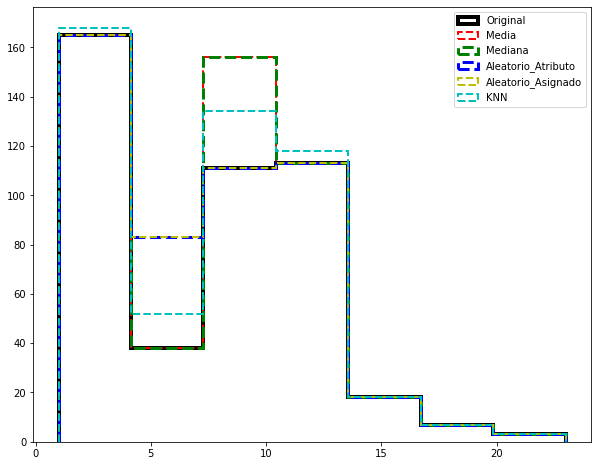

In [20]:
# 4. GRÁFICOS DE MÉTODOS DE IMPUTACIÓN
plt.figure(figsize=(10,8)) 
plt.hist(Datos3["Pub hora"],label="Original",color="k",histtype="step",bins=7,lw=4) # Histograma color="k"  negro el histtype="step" evita rellenar las barras bins=clases o numero de barrAS
plt.hist(Datos3["Pub hora_mean"],label="Media",color="r",histtype="step",bins=7,lw=2,linestyle="--") ##lw grosor linea
plt.hist(Datos3["Pub hora_median"],label="Mediana",color="g",histtype="step",bins=7,lw=3,linestyle="--") ##lw grosor linea
plt.hist(Datos3["Pub hora_random"],label="Aleatorio_Atributo",color="b",histtype="step",bins=7,lw=3,linestyle="--")
plt.hist(Datos3["Pub hora_random_fixed"],label="Aleatorio_Asignado",color="y",histtype="step",bins=7,lw=2,linestyle="--")
plt.hist(Xtrans ["Pub hora"],label="KNN",color="c",histtype="step",bins=7,lw=2,linestyle="--")
plt.legend()
plt.show()

No handles with labels found to put in legend.


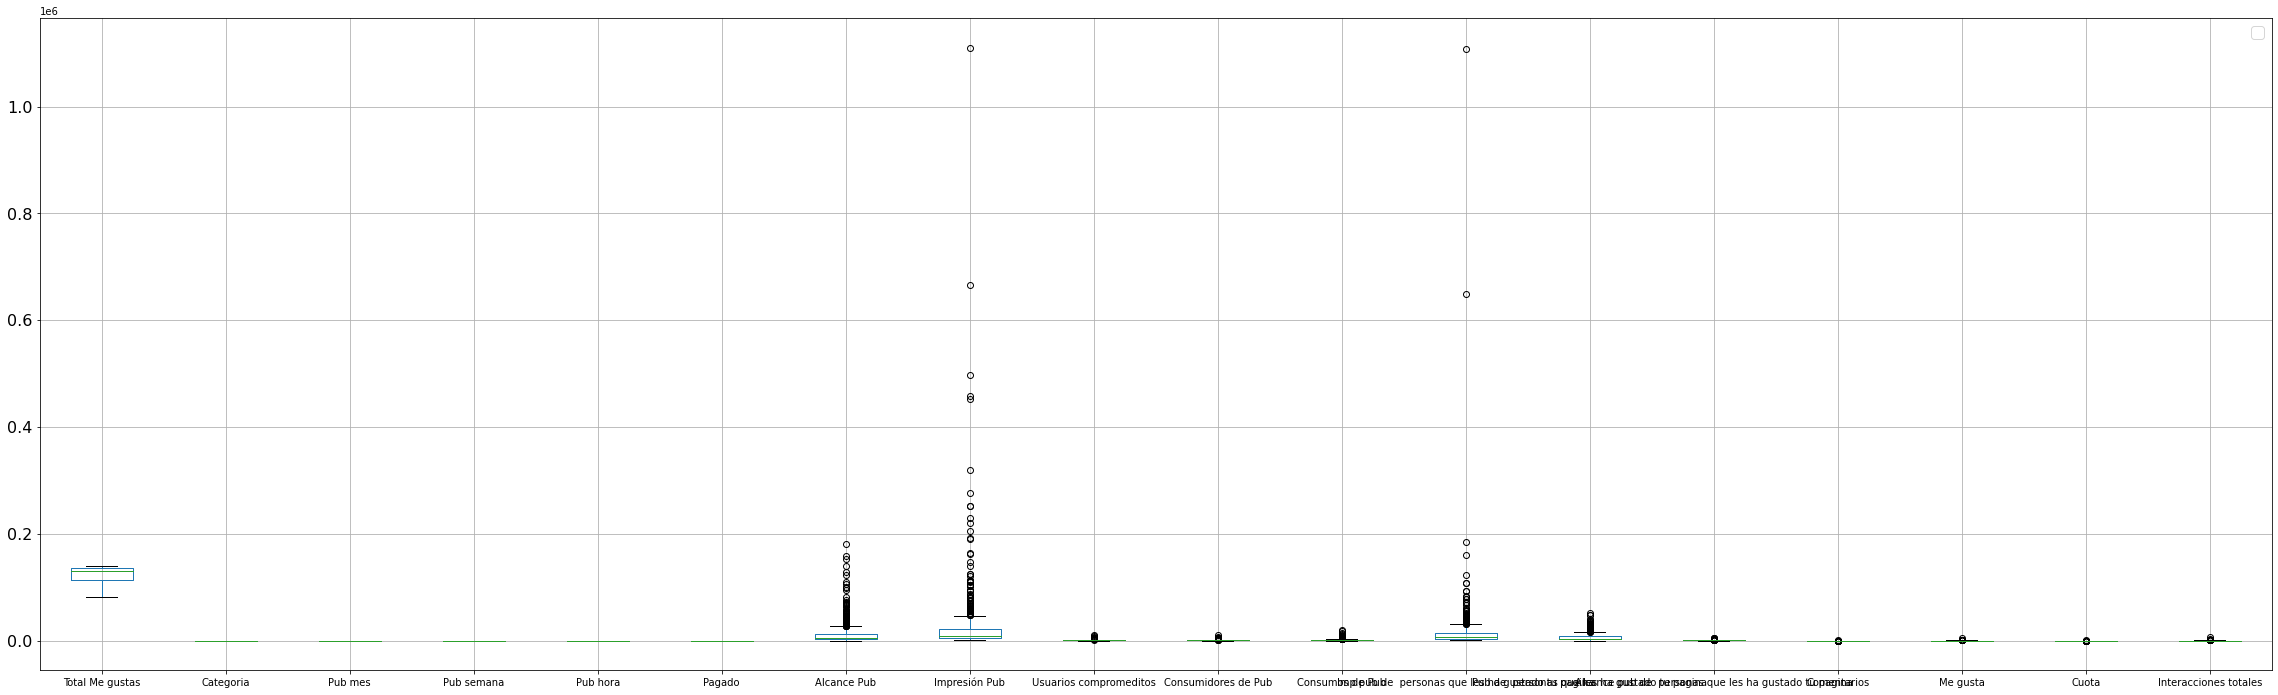

In [27]:
#7.DETECTANDO DATOS ATÍPICOS Y ELIMINANDOLOS
plt.figure(figsize=(40,12))
Xtrans.boxplot(grid=True,fontsize=10)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [34]:
#ELIMINANDO DATOS ATÍPICOS DE LA VARIABLE Imp pub de  personas que les ha gustado tu pagina
import scipy.stats as st
alpha = 0.05
cv = st.t.ppf(1-alpha/2, 6)
# El z-score para todos los datos es:
G=np.max(abs(Xtrans["Imp pub de  personas que les ha gustado tu pagina"]-Xtrans["Imp pub de  personas que les ha gustado tu pagina"].mean())/Xtrans["Imp pub de  personas que les ha gustado tu pagina"].std())
Gi=abs(Xtrans["Imp pub de  personas que les ha gustado tu pagina"]-Xtrans["Imp pub de  personas que les ha gustado tu pagina"].mean())/Xtrans["Imp pub de  personas que les ha gustado tu pagina"].std()
Gi[Gi==Gi.max()]
print("El estadístico de prueba es",Gi.max(), "o sea el dato de la fila", Gi[Gi==Gi.max()])
if G>cv:
    print("El valor es un extremo")
if G<=cv:
    print("El valor NO es un extremo")
    

El estadístico de prueba es 18.247558445390155 o sea el dato de la fila 415    18.247558
Name: Imp pub de  personas que les ha gustado tu pagina, dtype: float64
El valor es un extremo


In [35]:
Xtrans2=Xtrans.drop([415],axis=0)

In [37]:
#ELIMINANDO DATOS ATÍPICOS DE LA VARIABLE Imp pub de  personas que les ha gustado tu pagina
import scipy.stats as st
alpha = 0.05
cv = st.t.ppf(1-alpha/2, 6)
# El z-score para todos los datos es:
G=np.max(abs(Xtrans2["Imp pub de  personas que les ha gustado tu pagina"]-Xtrans2["Imp pub de  personas que les ha gustado tu pagina"].mean())/Xtrans2["Imp pub de  personas que les ha gustado tu pagina"].std())
Gi=abs(Xtrans2["Imp pub de  personas que les ha gustado tu pagina"]-Xtrans2["Imp pub de  personas que les ha gustado tu pagina"].mean())/Xtrans2["Imp pub de  personas que les ha gustado tu pagina"].std()
Gi[Gi==Gi.max()]
print("El estadístico de prueba es",Gi.max(), "o sea el dato de la fila", Gi[Gi==Gi.max()])
if G>cv:
    print("El valor es un extremo")
if G<=cv:
    print("El valor NO es un extremo")

El estadístico de prueba es 18.401801687636056 o sea el dato de la fila 460    18.401802
Name: Imp pub de  personas que les ha gustado tu pagina, dtype: float64
El valor es un extremo


In [38]:
Xtrans3=Xtrans2.drop([460],axis=0)

In [40]:
#ELIMINANDO DATOS ATÍPICOS DE LA VARIABLE Impresión Pub
G=np.max(abs(Xtrans3["Impresión Pub"]-Xtrans3["Impresión Pub"].mean())/Xtrans3["Impresión Pub"].std())
Gi=abs(Xtrans3["Impresión Pub"]-Xtrans3["Impresión Pub"].mean())/Xtrans3["Impresión Pub"].std()
Gi[Gi==Gi.max()]
print("El estadístico de prueba es",Gi.max(), "o sea el dato de la fila", Gi[Gi==Gi.max()])
if G>cv:
    print("El valor es un extremo")
if G<=cv:
    print("El valor NO es un extremo")

El estadístico de prueba es 9.002247502962117 o sea el dato de la fila 463    9.002248
Name: Impresión Pub, dtype: float64
El valor es un extremo


In [41]:
Xtrans4=Xtrans3.drop([463],axis=0)

In [56]:
Xtrans4=Xtrans3[1:400]

No handles with labels found to put in legend.


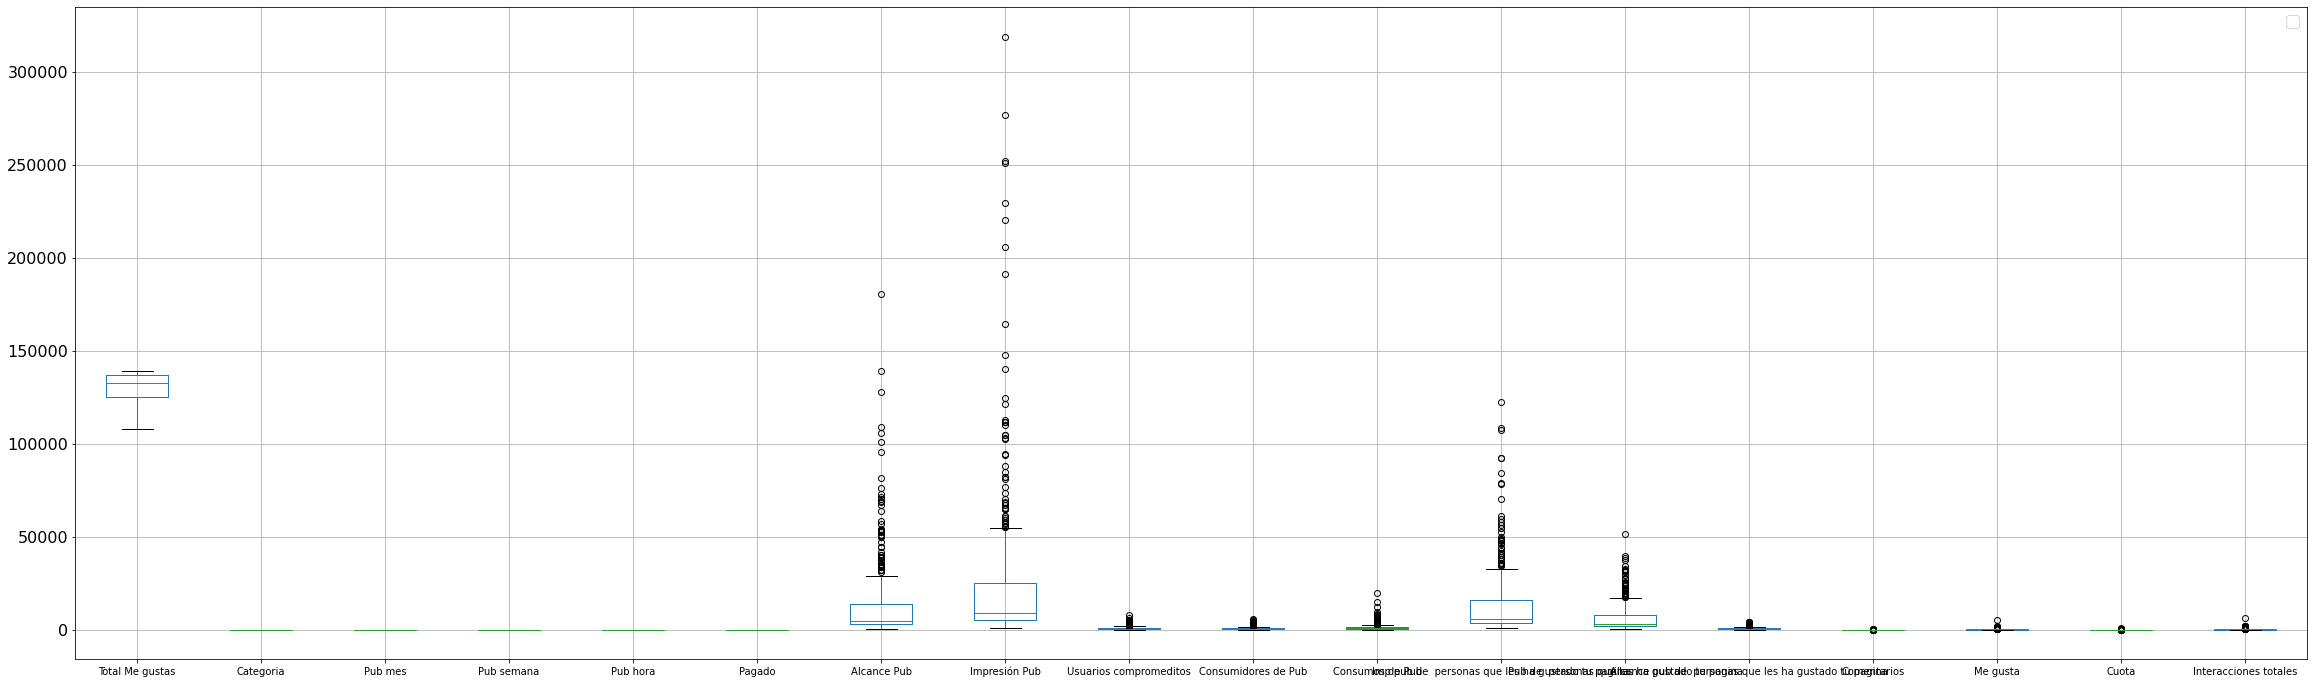

In [57]:
plt.figure(figsize=(40,12))
Xtrans4.boxplot(grid=True,fontsize=10)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [63]:
import seaborn as sns

In [61]:
#8. ANALISIS DE REGRESIÓN
Datos=Datos.select_dtypes(include=['int64',"float64"]) #Eliminamos la columna o atributo Tipo que es categorica y deja los numericos
Datos.head(5)

,Total Me gustas,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,Consumos de Pub,Imp pub de personas que les ha gustado tu pagina,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales
0,139441,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


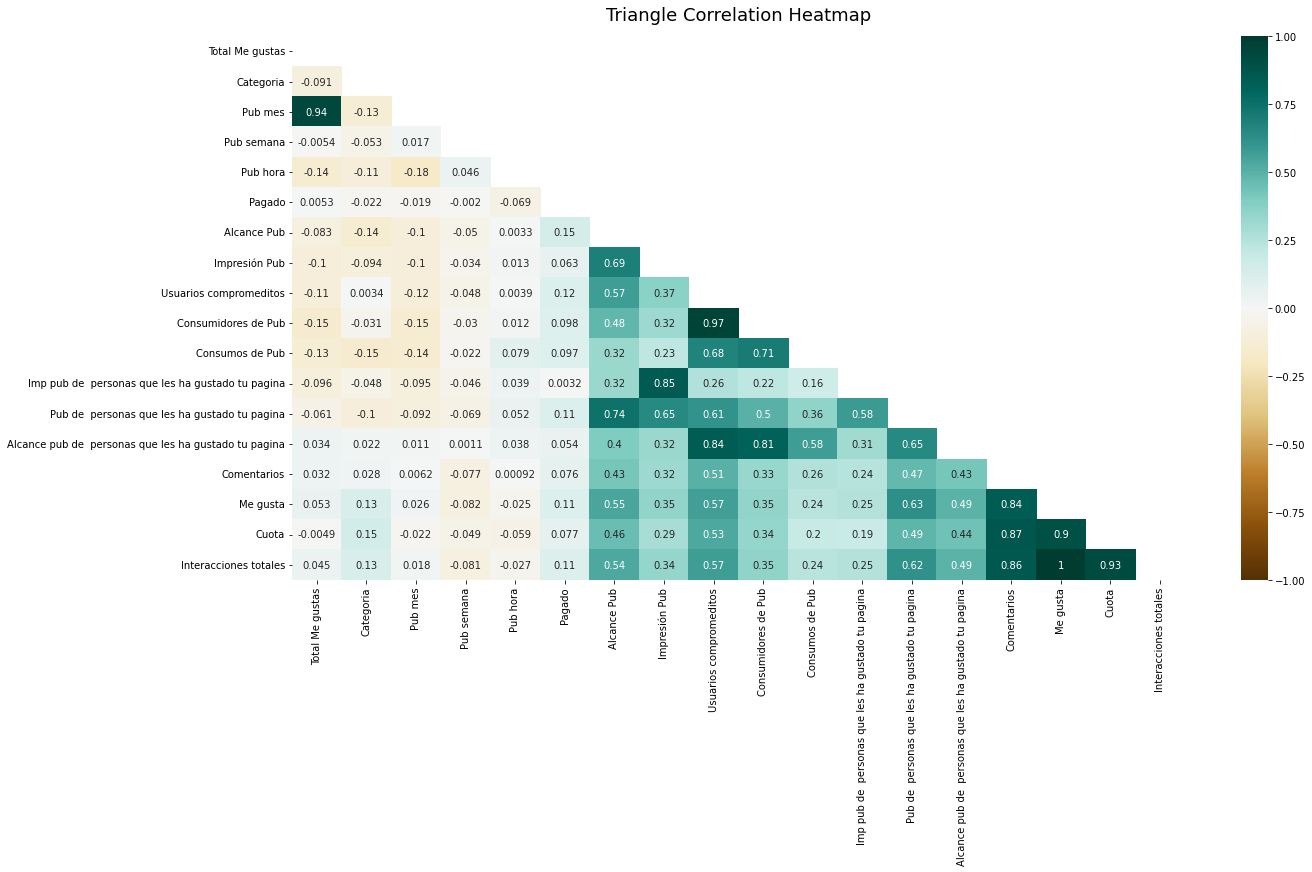

In [64]:
#TRIANGULO DE CORRELACION
plt.figure(figsize=(20,10))
mask = np.triu(np.ones_like(Datos.corr(), dtype=np.bool))
heatmap = sns.heatmap(Datos.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')  #Cmap gama de colores
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()


In [60]:
Datos

,Total Me gustas,Tipo,Categoria,Pub mes,Pub semana,Pub hora,Pagado,Alcance Pub,Impresión Pub,Usuarios compromeditos,Consumidores de Pub,Consumos de Pub,Imp pub de personas que les ha gustado tu pagina,Pub de personas que les ha gustado tu pagina,Alcance pub de personas que les ha gustado tu pagina,Comentarios,Me gusta,Cuota,Interacciones totales
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91.0,38.0,136


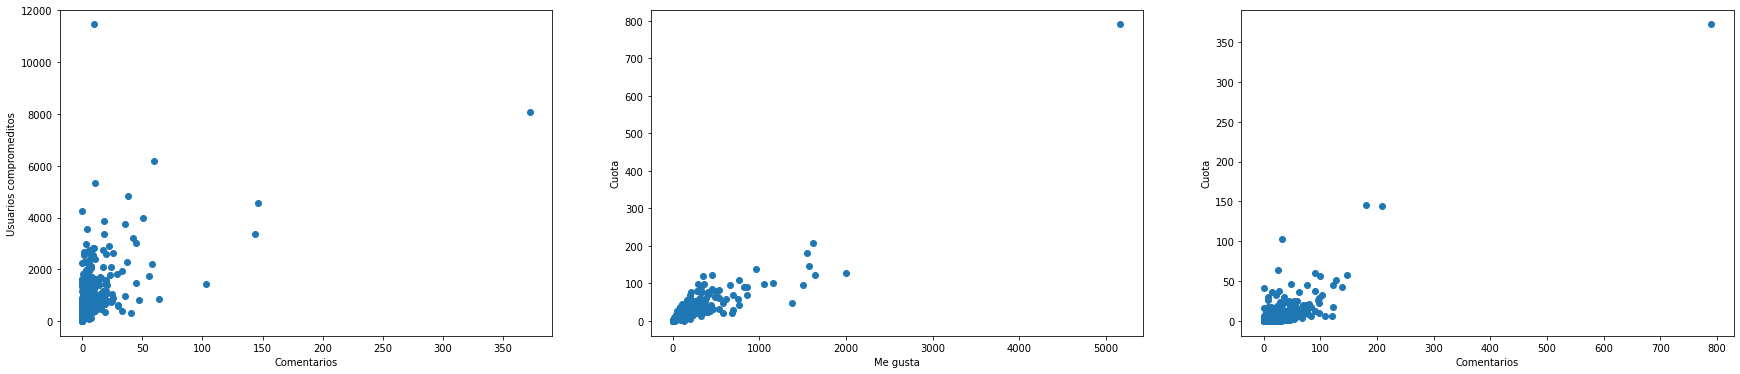

In [65]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(Datos["Comentarios"],Datos["Usuarios compromeditos"])
plt.xlabel("Comentarios")
plt.ylabel("Usuarios compromeditos")
plt.subplot(132)
plt.scatter(Datos["Me gusta"],Datos["Cuota"])
plt.xlabel("Me gusta")
plt.ylabel("Cuota")
plt.subplot(133)
plt.scatter(Datos["Cuota"],Datos["Comentarios"])
plt.xlabel("Comentarios")
plt.ylabel("Cuota")
plt.show()

In [66]:
#USANDO Scipy
from scipy import optimize
import random

In [67]:
def f( x, p0, p1):
    return p0+p1*x

def ff(x, p):
    return f(x, *p)

In [68]:
#Using optimize.leastsq
def fit_leastsq(p0, datax, datay, function):

    errfunc = lambda p, x, y: function(x,p) - y

    pfit, pcov, infodict, errmsg, success = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_leastsq(pstart, Datos["Me gusta"], Datos["Cuota"], ff)

print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from lestsq method :
pfit =  [1.69310688 1.37697383]
perr =  [0. 0.]


In [70]:
#R CUADRADO
def r2_hand(y,yhat):
    SST=np.sum((y-np.mean(y))**2)
    SSE=np.sum((y-yhat)**2)
    R2=(SST-SSE)/SST
    return R2

print('r2 score for perfect model is', r2_hand(Datos["Me gusta"], f(Datos["Cuota"],*pfit)))

r2 score for perfect model is 0.10979493952276623


In [71]:
A=0/1.26419289
B=0/1.68580267

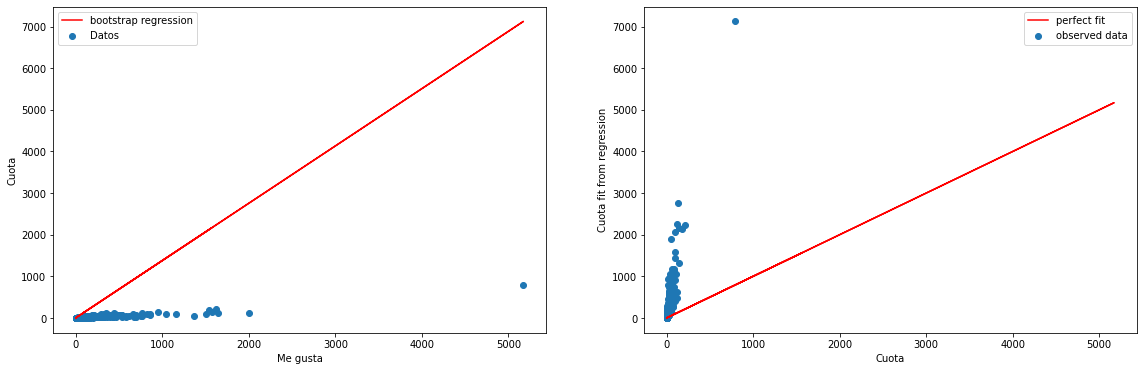

In [69]:
plt.figure(figsize=(30,6))
plt.subplot(131)
plt.scatter(Datos["Me gusta"],Datos["Cuota"],label="Datos")
x0=Datos["Me gusta"]
plt.plot(x0,f(x0,*pfit),color="r",label="bootstrap regression")
plt.xlabel("Me gusta")
plt.ylabel("Cuota")
plt.legend()
plt.subplot(132)
plt.scatter(Datos["Cuota"],f(x0,*pfit),label="observed data")
plt.plot(x0,x0,color="r",label="perfect fit")
plt.xlabel("Cuota")
plt.ylabel("Cuota fit from regression")
plt.legend()
plt.show()

In [72]:
###Using bootstrap
def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: function(x,p) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 100 random data sets are generated and fitted
    ps = []
    for i in range(100):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta
        randomfit, randomcov = optimize.leastsq(errfunc, p0, args=(datax, randomdataY), full_output=0)
        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

pfit, perr = fit_bootstrap(pstart, Datos["Me gusta"], Datos["Cuota"], ff)

print("\n# Fit parameters and parameter errors from bootstrap method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from bootstrap method :
pfit =  [1.69310688 1.37697383]
perr =  [2.44249065e-15 1.33226763e-15]


In [83]:
#R CUADRADO
def r3_hand(y1,yhat1):
    SST=np.sum((y1-np.mean(y1))**2)
    SSE=np.sum((y1-yhat1)**2)
    R3=(SST-SSE)/SST
    return R3

print('r2 score for perfect model is', r3_hand(Datos["Me gusta"], f(Datos["Cuota"],*pfit)))

r2 score for perfect model is 0.10979493952276666


In [78]:
AA=2.66453526e-15/1.26419289
BB=2.66453526e-15/1.68580267

In [86]:
#COMOPARANDO COEFICIENTES DE PEARSON PARA CADA METODO POR  A Y B 
ANALISIS = {'Método': ['optimize.leastsq', 'bootstrap'],
'A': [A, AA],
'B': [B, BB],
"r2":[0.1098, 0.1098]}
df = pd.DataFrame(ANALISIS,
columns=['Método', 'A', 'B', "r2"])
df

,Método,A,B,r2
0,optimize.leastsq,0.000000e+00,0.000000e+00,0.1098
1,bootstrap,2.107697e-15,1.580574e-15,0.1098


#**5. ANÁLISIS DE MÉTODOS DE IMPUTACIÓN DE DATOS**

Para el siguiente trabajo se selecciona una base de datos de una investigación que estudiaba las Métricas de rendimiento de Facebook de la página de Facebook de una marca de cosméticos de renombre, la base de datos contiene 19 atributos (columnas o variables) y 500 instancias (filas). De la base de datos seleccionada lo primero que se realiza es eliminar los atributos categoricos para trabajar solo con los numérico, en este casoen específicose eliminó la variable denominada ***Tipo***. Inicialmente se encontraron 5 instancias con datos faltantes, posteriormente se contamina la Data mediante lineas de códigos que generaron 251 instancias con datos faltantes. 

Seguido se analiza que variable o atributo que contienen mayor cantidad de datos faltantes siendo esta ***"Pub hora"***, una vez identificado el atributo se utilizan varios métodos para limpiar la base de datos. los métodos utilizados son los siguiente:

1.   ***Media y Mediana:*** Rellenamos los datos faltantes del atributo ***Pub Hora*** en un primer ensayo con la media y en un segundoensayo con la mediana de los mismos generando dos columnas mas a la copia de la base de datos utilizados  
2.  *** Aleatorios: ***De la copia trabajada en el item anterior ensayamos rellenando los datos en una primera parte con números aleatorios que se generan de acuerco al rango de datos del atributo y en una segunda instancia limpiamos teniendo en cuenta un número asignado por nuestro criterio
3. ***KNN:*** Por ultimo utilizamos una otra forma de limpieza, la cual es una heramienta del Machine Learning. Básicamente es un algoritmo que se basa en la disitancias que existen entre cada elemento de los atributos para escoger los valores mas cercanos al dato faltante y asignarlo. En este algoritmo no hay que identificar los atributos,el recorre todas las posiciones y reemplaza el dato de acuerdo al criterio ya expuesto.

![Imagen 1. Análisis de Métodos de Imputación](https://github.com/Neverurueta/2022-04-09-Limpieza-de-Datos.-Entrega-1/blob/main/Imagen%201.png?raw=true)


El gráfico Anterior establece la distribución de la variable original denominada ***"Pub hora"*** (de color negro en el gráfico) y de cada una de las imputaciones realizadas con los métodos descritos anteriormente, nos damos cuenta de que la mejor imputación es la *random_fixed* (Aleatorio Atributo), seguida del método random_fixed. Lás imputaciones que más se alejan del comportamiento de la variable original son las realizadas mediante la media y la meidana. 

***DATOS ATÍPICOS***

De la matriz resultante del proceso de imputación KNN realizamos gráficos de caja y bigotes para detectar datos atípicos para cada variabe, con el test de Grubbs detectamos el dato atípico de la variable detectada en el gráfico. 

![Imagen 2. Análisis de Métodos de Imputación](https://github.com/Neverurueta/2022-04-09-Limpieza-de-Datos.-Entrega-1/blob/main/Imagen%202.png?raw=true)

Las variables con datos atipicos según elgráfico anterior son: 
*   *Impresión Pub*
*   *Imp pub de personas que les ha gustado tu pagina*

Se proceden a eliminar datos atípicos de estas dos variables encontrandoce que siguen surgiendo muchos más datos atípicios o alejados, por lque se realiza una  prueba de acuerdo a la sospecha de una tendencia en las posiciones de las últimas 100 instancias se eliminan estas instancias quedandonos con una dataframe de solo 400 instancias pero al igual siguen apareciendo datos atípicos como se ilustra en la  Imagen 3. Por loque se concluye que los datos no se pueden seguir tratando de con este método debido a su variación. 

![Imagen 3. Análisis de Métodos de Imputación](https://github.com/Neverurueta/2022-04-09-Limpieza-de-Datos.-Entrega-1/blob/main/Imagen%203.png?raw=true)



***ANÁLISIS MEDIANTE REGRESIÓN LINEAL***

Se realiza Triangulo de correlación para determinar que variables están mayormente relacionadas y así poder estudiarla. 

En nuestro caso se escoge como variable Dependiente la denominada *Cuota* y como variables independientes *Me gusta, Comentarios, Usuarios comprometidos*.

Para el análisis de regresión se escogen dos variables, se presume como variable dependiente *Cuota* y como variable independiente *Me gusta*. Con estás dos variables se proponen dos métodos para estudiar la correlación, el primero denomidado *leastsq* y el segundo *bootstrap*, los resultados de muestran en la siguiente tabla: 

|index|Método|A|B|r2|
|---|---|---|---|---|
|0|optimize\.leastsq|0\.0|0\.0|0\.1098|
|1|bootstrap|2\.1076967613700156e-15|1\.5805736385504717e-15|0\.1098|

En lla tabla se muestra que los errores asociados a los métodos son prácticamente cero pero si que remos escoger uno sería *leastsq*. En este caso podemos afirmar que hayuna relación positiva de 10,98% entre la variable *Cuota* y la variable *Me gusta*.